In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2


In [2]:
!pip install opencv-python



  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a1/f6/57de91ea40c670527cd47a6548bf2cbedc68cec57c041793b256356abad7/opencv_python-4.8.1.78-cp37-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 1.2 MB/s eta 0:00:0000:0100:010m


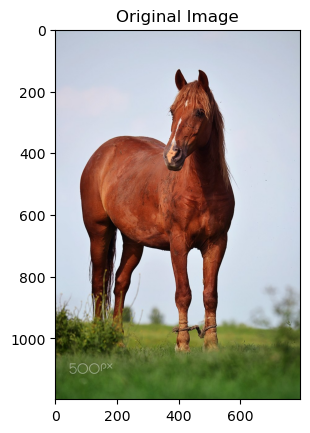

(1198, 794, 3)


In [8]:
# Load image
img = cv2.imread('horse.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Original Image')
plt.show()
print(img_rgb.shape)

red, green, blue = cv2.split(img_rgb)

In [9]:
# Normalize the channels
red = red.astype(float) / 255.0
green = green.astype(float) / 255.0
blue = blue.astype(float) / 255.0
blue /= 255.0

In [10]:
# Perform PCA from scratch
class PCAFromScratch:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        centered_data = X - self.mean

        cov_matrix = np.cov(centered_data, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.components = eigenvectors[:, sorted_indices[:self.n_components]]

    def transform(self, X):
        # Center the input data
        centered_data = X - self.mean
        reduced_data = np.dot(centered_data, self.components)

        return reduced_data

    def inverse_transform(self, X_reduced):
        return np.dot(X_reduced, self.components.T) + self.mean

In [11]:
# Number of components for PCA
n_components = 10

In [12]:
# Create an instance of the PCA class
pca_red = PCAFromScratch(n_components)
pca_green = PCAFromScratch(n_components)
pca_blue = PCAFromScratch(n_components)


In [13]:
# Fit the PCA model to each channel
pca_red.fit(red)
pca_green.fit(green)
pca_blue.fit(blue)

In [14]:
# Transform each channel
red_transformed = pca_red.transform(red)
green_transformed = pca_green.transform(green)
blue_transformed = pca_blue.transform(blue)

In [15]:
# Check the shape of each transformed channel
print(red_transformed.shape, green_transformed.shape, blue_transformed.shape)

(1198, 10) (1198, 10) (1198, 10)


In [16]:
# Inverse transform to recover the original data shape
red_reconstructed = pca_red.inverse_transform(red_transformed)
green_reconstructed = pca_green.inverse_transform(green_transformed)
blue_reconstructed = pca_blue.inverse_transform(blue_transformed)

In [17]:
# Check the shape of each reconstructed channel
print(red_reconstructed.shape, green_reconstructed.shape, blue_reconstructed.shape)


(1198, 794) (1198, 794) (1198, 794)


In [18]:
# Merge all the inverse transforms into one
merged_reconstructed = cv2.merge([red_reconstructed, green_reconstructed, blue_reconstructed])


Text(0.5, 1.0, 'Original Image')

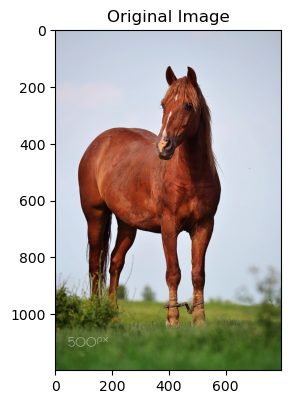

In [19]:
# Display the original image and the compressed image obtained after merging
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

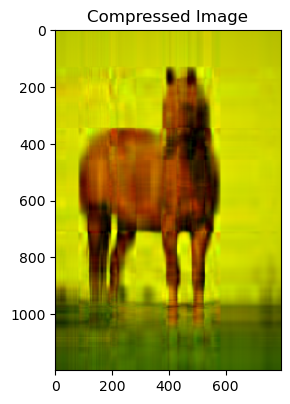

In [20]:
plt.subplot(1, 2, 2)
plt.imshow(np.clip(merged_reconstructed, 0, 1))  # Clip to the valid range [0, 1]
plt.title('Compressed Image')

plt.show()